**Origins**

Michelin Stars originated in a country best known for its passion for cuisine – France. Originally they were a feature of the Michelin guide books published in 1900 by Andre and Edourd Michelin - the founders of the Michelin tyre company.
Having started the company in 1889 the brothers were looking for a method to compel the then limited number of drivers to make more journeys and by extension, buy more tyres. The guide listed a wealth of information for motorists which included where to find the best meals and accommodation whilst touring in their cars.

As the business grew, so did the guide, becoming so popular that a charge was introduced in 1920.

By then, the dining element was in such high demand that Michelin decided to set up a team of inspectors whose job it was to visit – anonymously - and rate restaurants on a 3-category basis. The rating systems – still in place today and with more than a passing nod to its motoring roots - was referred to as ‘Michelin Stars’. 3 stars being ‘exceptional cuisine, worth a special journey’, 2 stars ‘excellent cooking, worth a detour and 1 star, a very good restaurant in its category’

The data for both one-star and two-star Michelin restaurants contain the following columns:

name: Name of the restaurant
year: Year the data was recorded
latitude: Latitude coordinate of the restaurant's location
longitude: Longitude coordinate of the restaurant's location
city: City where the restaurant is located
region: Region where the restaurant is located
zipCode: Postal code of the restaurant's location
cuisine: Type of cuisine served at the restaurant
price: Price category of the restaurant
url: URL to the restaurant's Michelin guide page


Steps for Analysis:
Combine the Data: Merge the one-star and two-star restaurant data for a comprehensive view.
Filter by Location: Focus on restaurants in Paris.
Analyze Cuisine Types: Identify the most common types of cuisine.
Price Analysis: Understand the price distribution.
Geographic Distribution: Visualize the geographic distribution of these restaurants in Paris.


These steps will help you analyze the data and provide insights into the Michelin-starred restaurants in Paris, including the types of cuisine and their distribution.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load the standard libraries to visualize data set
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/michelin-star-restaurants/one-star-michelin-restaurants.csv
/kaggle/input/michelin-star-restaurants/three-stars-michelin-restaurants.csv
/kaggle/input/michelin-star-restaurants/two-stars-michelin-restaurants.csv


In [2]:
# Load the three Michelin Stars dataset into a pandas dataframe

one_star = pd.read_csv('/kaggle/input/michelin-star-restaurants/one-star-michelin-restaurants.csv')
two_stars = pd.read_csv('/kaggle/input/michelin-star-restaurants/two-stars-michelin-restaurants.csv')
three_stars = pd.read_csv('/kaggle/input/michelin-star-restaurants/three-stars-michelin-restaurants.csv')


In [3]:
# Display the first 5 rows of one dataset

one_star.head(5)


,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...


In [4]:
# Add a new Michelin stars Classification Column

one_star['Michelin stars'] = 1
two_stars['Michelin stars'] = 2
three_stars['Michelin stars'] = 3

# Join the three tables for an easier analysis

michelin_stars = pd.concat([one_star,two_stars,three_stars],axis=0)
michelin_stars

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin stars
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
...,...,...,...,...,...,...,...,...,...,...,...
31,Fat Duck,2019,51.508280,-0.702320,Bray,United Kingdom,SL6 2AQ,Creative,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
32,Waterside Inn,2019,51.507730,-0.701210,Bray,United Kingdom,SL6 2AT,Classic French,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
33,Alain Ducasse at The Dorchester,2019,51.507120,-0.152520,Mayfair,United Kingdom,W1K 1QA,French,NaN,https://guide.michelin.com/gb/en/greater-londo...,3
34,The Araki,2019,51.511826,-0.140389,Mayfair,United Kingdom,W1S 3BF,Japanese,NaN,https://guide.michelin.com/gb/en/greater-londo...,3


In [5]:
michelin_stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 35
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            695 non-null    object 
 1   year            695 non-null    int64  
 2   latitude        695 non-null    float64
 3   longitude       695 non-null    float64
 4   city            693 non-null    object 
 5   region          695 non-null    object 
 6   zipCode         501 non-null    object 
 7   cuisine         695 non-null    object 
 8   price           519 non-null    object 
 9   url             695 non-null    object 
 10  Michelin stars  695 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 65.2+ KB


# **Data Cleaning and Preprocessing**

In [6]:
#Drop columns

michelin_stars = michelin_stars.drop(columns=['url','zipCode'])

* Some columns were omitted, such as ‘url’ and ’zipCode’ because of their low relevance for this analysis

In [7]:
#Duplicates

duplicates_stars = michelin_stars[michelin_stars.duplicated()].copy()
duplicates_stars

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars


* Data shows has 0 duplicates.

In [8]:
#Missing values

michelin_stars.isna().sum()

name                0
year                0
latitude            0
longitude           0
city                2
region              0
cuisine             0
price             176
Michelin stars      0
dtype: int64

* Data shows missing values on columns 'city' and 'price' that needs handling.

In [9]:
print(michelin_stars['price'].unique())

['$$$$$' '$$$$' '$$$' '$$' '$' nan]


In [10]:
#Handling missing values (NaN values) on the 'price' column
 
michelin_stars['price'].fillna('', inplace=True)
print(michelin_stars['price'].unique())

['$$$$$' '$$$$' '$$$' '$$' '$' '']


/tmp/ipykernel_18/3430188342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  michelin_stars['price'].fillna('', inplace=True)


In [11]:
# Locate missing values in the 'city' column
missing_values = michelin_stars[michelin_stars['city'].isna()]

# Display the rows with missing values
print(missing_values)

      name  year   latitude   longitude city     region     cuisine price  \
152  Épure  2019  22.295830  114.169304  NaN  Hong Kong      French   $$$   
166  Arbor  2019  22.283146  114.155420  NaN  Hong Kong  Innovative   $$$   

     Michelin stars  
152               1  
166               1  


In [12]:
#Handling missing values (NaN values) on the 'city' column  

michelin_stars['city'].fillna('', inplace=True)
missing_values = michelin_stars[michelin_stars['city'].isna()]
print(missing_values)

Empty DataFrame
Columns: [name, year, latitude, longitude, city, region, cuisine, price, Michelin stars]
Index: []


/tmp/ipykernel_18/1127807254.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  michelin_stars['city'].fillna('', inplace=True)


In [13]:
#Confirming there is no missing values
michelin_stars.isna().sum()

name              0
year              0
latitude          0
longitude         0
city              0
region            0
cuisine           0
price             0
Michelin stars    0
dtype: int64

* Data is now clean and there is no further missing values.

# **Summary Statistics**

In [14]:
#Statistics
michelin_stars.describe(include='all',)

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars
count,695,695.000000,695.000000,695.000000,695,695,695,695,695.000000
unique,684,NaN,NaN,NaN,180,24,70,6,NaN
top,L'Atelier de Joël Robuchon,NaN,NaN,NaN,New York,United Kingdom,Modern cuisine,$$$$,NaN
freq,3,NaN,NaN,NaN,74,162,108,197,NaN
mean,NaN,2018.943885,37.260124,4.417000,NaN,NaN,NaN,NaN,1.261871
std,NaN,0.230310,18.025875,81.095189,NaN,NaN,NaN,NaN,0.545270
min,NaN,2018.000000,-23.634005,-123.719444,NaN,NaN,NaN,NaN,1.000000
25%,NaN,2019.000000,25.040718,-73.982920,NaN,NaN,NaN,NaN,1.000000
50%,NaN,2019.000000,40.727130,-0.149570,NaN,NaN,NaN,NaN,1.000000
75%,NaN,2019.000000,51.508962,100.578855,NaN,NaN,NaN,NaN,1.000000


# **Data Visualization**

*** Categorize price($) into 5 different groups (Inexpensive, Moderate, Expensive, Very Expensive, Luxury):**

In [15]:
def price_group(price_symbol):
    return ('Inexpensive' if price_symbol == '$' 
            else 'Moderate' if price_symbol == '$$' 
            else 'Expensive' if price_symbol == '$$$' 
            else 'Very Expensive' if price_symbol == '$$$$' 
            else 'Luxury' if price_symbol == '$$$$$' 
            else 'Unknown')

michelin_stars['price_group'] = michelin_stars['price'].apply(price_group)
price_group_counts = michelin_stars['price_group'].value_counts()
print(price_group_counts)

price_group
Very Expensive    197
Unknown           176
Expensive         143
Moderate           75
Luxury             73
Inexpensive        31
Name: count, dtype: int64


*** Distribution of Price Range:**

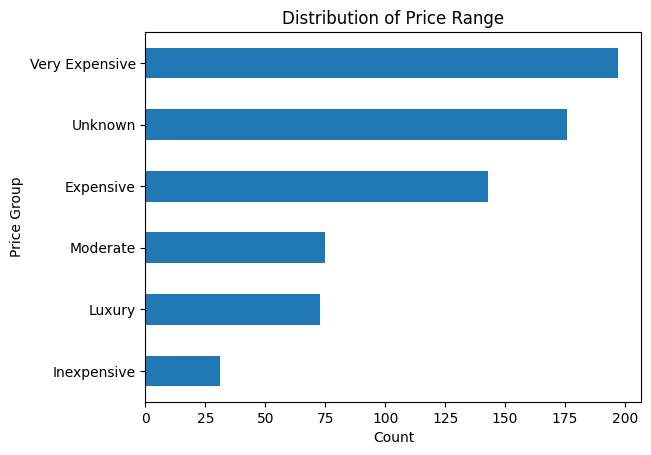

In [16]:
# Plot it in a horizontal bar chart for a better reading

price_group_counts.sort_values().plot.barh()
plt.title('Distribution of Price Range')
plt.xlabel('Count')
plt.ylabel('Price Group')
plt.show()

* **Distribution of Michelin Stars around the World:**

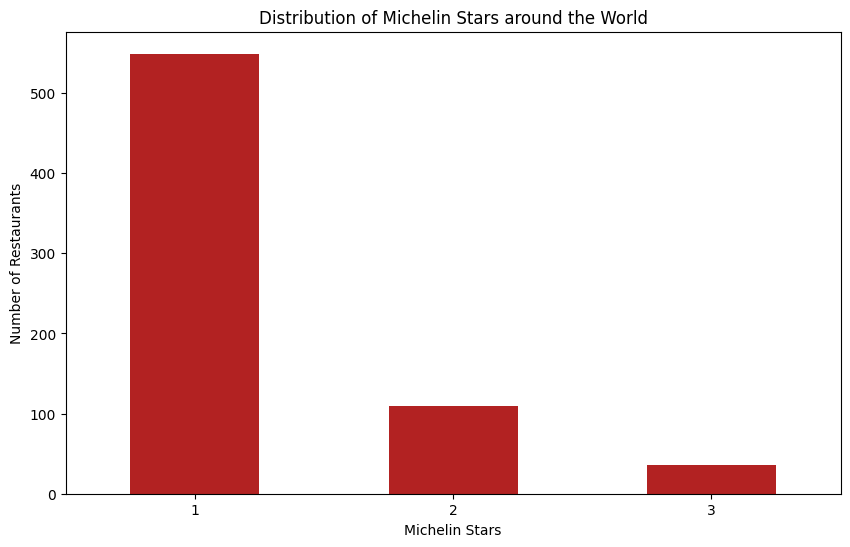

In [17]:
star_counts = michelin_stars['Michelin stars'].value_counts()

# Plot the bar chart
star_counts.plot(kind='bar', figsize=(10, 6), color='firebrick')
plt.xlabel('Michelin Stars')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Michelin Stars around the World')
plt.xticks(rotation=0)  # Rotate x-axis labels(1,2,3) for better readability
plt.show()

*** Number of Michelin-starred Restaurants by Country:**

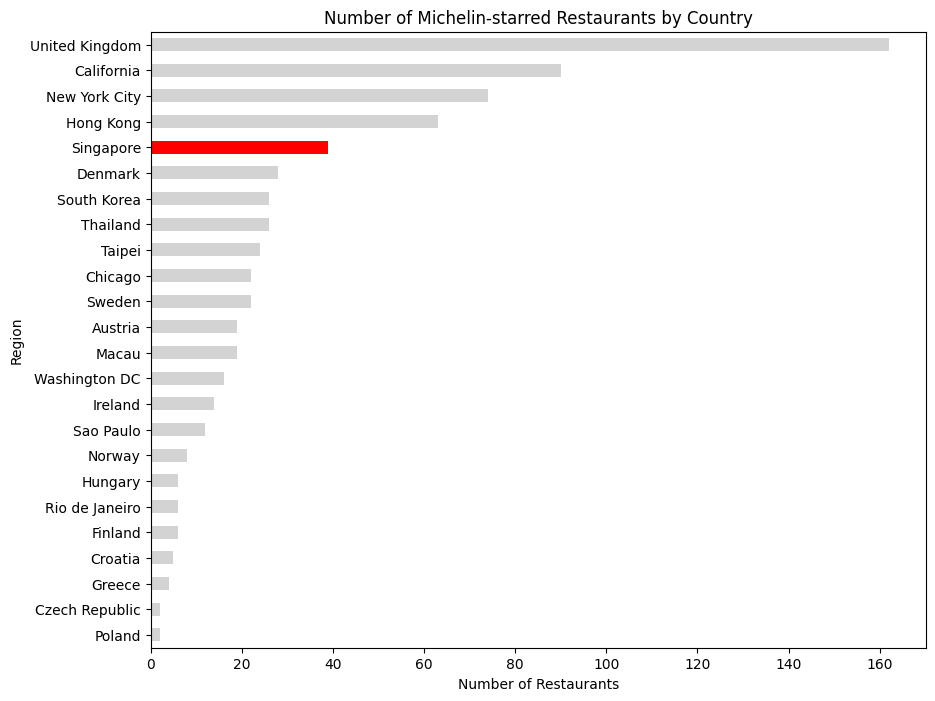

In [18]:
region_counts = michelin_stars['region'].value_counts().sort_values()

palette = ['lightgrey' if region != 'Singapore' else 'red' for region in region_counts.index]

# Plot a horizontal bar chart with the custom color palette
plt.figure(figsize=(10, 8))
region_counts.plot(kind='barh', color=palette)
plt.xlabel('Number of Restaurants')
plt.ylabel('Region')
plt.title('Number of Michelin-starred Restaurants by Country')
plt.show()

*** Michelin Star Restaurants located in Singapore:**

In [19]:
singapore_restaurants = michelin_stars[michelin_stars['region'].str.contains('Singapore', case=False, na=False)]

print(singapore_restaurants.shape)
print(singapore_restaurants.head(5))

(39, 10)
                                name  year  latitude  longitude       city  \
308  Hill Street Tai Hwa Pork Noodle  2018  1.305200  103.86240  Singapore   
309          Putien (Kitchener Road)  2018  1.309690  103.85730  Singapore   
310                      Chef Kang's  2018  1.304735  103.84955  Singapore   
311                        Garibaldi  2018  1.296564  103.85500  Singapore   
312                  Summer Pavilion  2018  1.291284  103.86030  Singapore   

        region      cuisine price  Michelin stars  price_group  
308  Singapore  Street Food     $               1  Inexpensive  
309  Singapore       Fujian     $               1  Inexpensive  
310  Singapore    Cantonese   $$$               1    Expensive  
311  Singapore      Italian     $               1  Inexpensive  
312  Singapore    Cantonese    $$               1     Moderate  


**Geographic Distribution of Michelin-starred Restaurants in Singapore:**

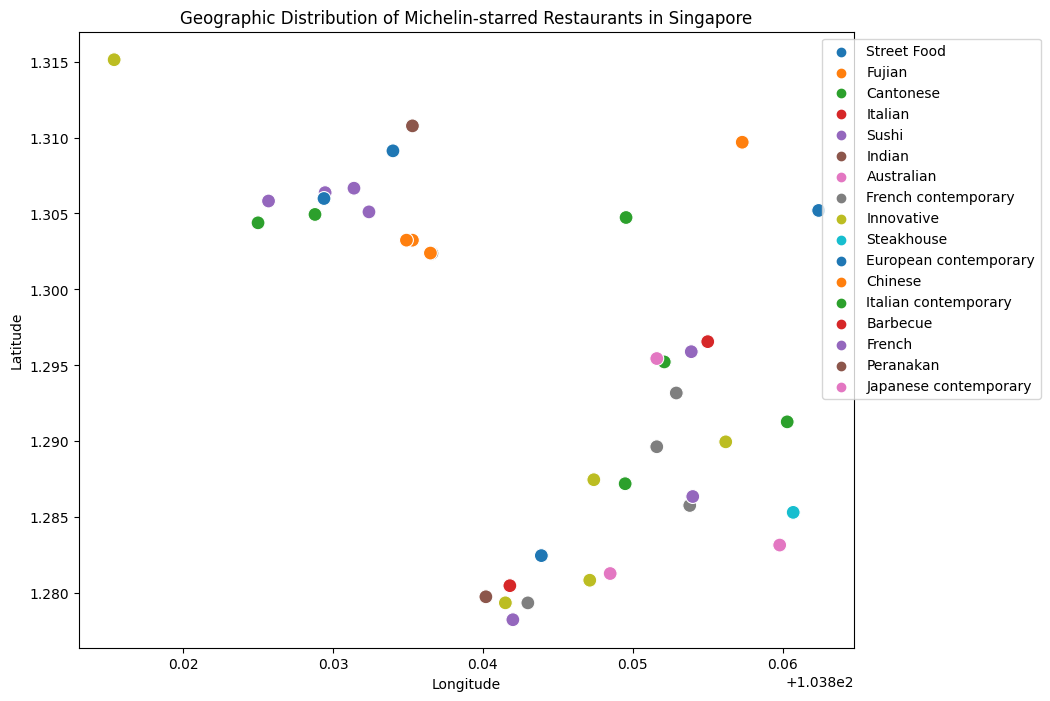

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=singapore_restaurants, hue='cuisine', palette='tab10', s=100)
plt.title('Geographic Distribution of Michelin-starred Restaurants in Singapore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


*** Distribution of Michelin star Restaurants by Cuisine in Singapore:**

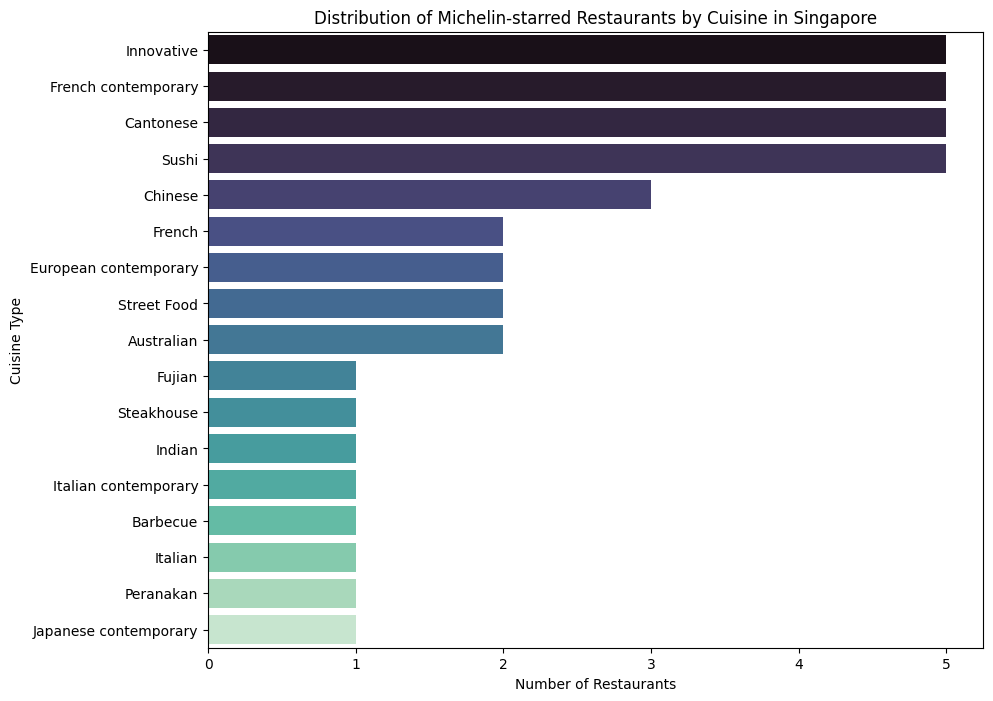

In [21]:
cuisine_counts = singapore_restaurants['cuisine'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='mako')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Distribution of Michelin-starred Restaurants by Cuisine in Singapore')
plt.show()

* **Price Range in Singapore:**

In [22]:
price_distribution = singapore_restaurants['price'].value_counts()
print(price_distribution)

price
$        16
$$       11
$$$       7
$$$$      3
$$$$$     2
Name: count, dtype: int64


*** In Singapore, there are:**

16 Inexpensive Michelin star Restaurants;

11 Moderate Michelin star Restaurants;

7 Expensive Michelin star Restaurants;

3 Expensive Michelin star Restaurants;

2 Expensive Michelin star Restaurants;

In [23]:
#RELATE CUISINES + PRICE IN SINGAPORE